# Chapter 1: Getting Started with Python Polars 

### Importing the Polars library

In [61]:
import polars as pl

### The Polars DataFrame

#### How to do it...

In [62]:
df = pl.DataFrame({
    'nums': [1,2,3,4,5],
    'letters': ['a','b','c','d','e']
})
df.head()

nums,letters
i64,str
1,"""a"""
2,"""b"""
3,"""c"""
4,"""d"""
5,"""e"""


In [63]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [64]:
df.schema

{'PassengerId': Int64,
 'Survived': Int64,
 'Pclass': Int64,
 'Name': Utf8,
 'Sex': Utf8,
 'Age': Float64,
 'SibSp': Int64,
 'Parch': Int64,
 'Ticket': Utf8,
 'Fare': Float64,
 'Cabin': Utf8,
 'Embarked': Utf8}

In [65]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [66]:
df.dtypes

[Int64,
 Int64,
 Int64,
 Utf8,
 Utf8,
 Float64,
 Int64,
 Int64,
 Utf8,
 Float64,
 Utf8,
 Utf8]

In [67]:
df.shape

(891, 12)

In [68]:
df.height

891

In [69]:
df.width

12

#### There is more...

In [72]:
import numpy as np
import pandas as pd

numpy_arr = np.array([[1,1,1], [2,2,2]])
df = pl.from_numpy(numpy_arr, schema={'ones': pl.Float32, 'twos': pl.Int8}, orient='col') 
df.head()

ones,twos
f32,i8
1.0,2
1.0,2
1.0,2


### The Polars Series

#### How to do it...

In [73]:
s = pl.Series('col', [1,2,3,4,5])
s.head()

col
i64
1
2
3
4
5


In [74]:
data = {'a': [1,2,3], 'b': [4,5,6]}
s_a = (
    pl.DataFrame(data)
    .to_series()
)
s_a.head()

a
i64
1
2
3


In [75]:
s_b = (
    pl.DataFrame(data)
    .to_series(1)
)
s_b.head()

b
i64
4
5
6


In [76]:
s_b2 = (
    pl.DataFrame(data)
    .get_column('b')
)
s_b2.head()

b
i64
4
5
6


In [77]:
s.shape

(5,)

In [78]:
s.name

'col'

In [79]:
s.dtype

Int64

### The Polars LazyFrame

#### How to do it...

In [80]:
data = {'name': ['Sarah',  'Mike', 'Bob', 'Ashley']}
lf = pl.LazyFrame(data) 
type(lf)

polars.lazyframe.frame.LazyFrame

In [81]:
lf.collect().head()

name
str
"""Sarah"""
"""Mike"""
"""Bob"""
"""Ashley"""


In [82]:
lf.fetch(3)

name
str
"""Sarah"""
"""Mike"""
"""Bob"""


In [83]:
lf = pl.scan_csv('../data/titanic_dataset.csv')
lf.fetch(5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [84]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.lazy().fetch(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""


In [85]:
lf.schema

{'PassengerId': Int64,
 'Survived': Int64,
 'Pclass': Int64,
 'Name': Utf8,
 'Sex': Utf8,
 'Age': Float64,
 'SibSp': Int64,
 'Parch': Int64,
 'Ticket': Utf8,
 'Fare': Float64,
 'Cabin': Utf8,
 'Embarked': Utf8}

In [86]:
lf.width

12

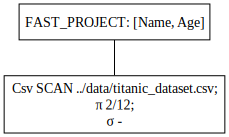

In [87]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .show_graph()
)

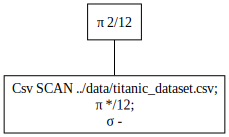

In [88]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .show_graph(optimized=False)
)

In [89]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .explain()
)

'FAST_PROJECT: [Name, Age]\n\n    Csv SCAN ../data/titanic_dataset.csv\n    PROJECT 2/12 COLUMNS'

In [90]:
print(
    lf
    .select(pl.col('Name', 'Age'))
    .explain()
    , sep='\n'
)

FAST_PROJECT: [Name, Age]

    Csv SCAN ../data/titanic_dataset.csv
    PROJECT 2/12 COLUMNS


### Selecting columns and filtering data

#### How to do it...

In [91]:
df = pl.read_csv('../data/titanic_dataset.csv') 
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [92]:
df.select(['Survived', 'Ticket', 'Fare']).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 31012…",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [93]:
df.select(pl.col(['Survived', 'Ticket', 'Fare'])).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 31012…",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [94]:
df.select(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 31012…",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [95]:
df.with_columns(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [96]:
df.with_columns(['Survived', 'Ticket', 'Fare']).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [97]:
df.with_columns(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [98]:
df.filter((pl.col('Age') >= 30)).head()


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""
7,0,1,"""McCarthy, Mr. …","""male""",54.0,0,0,"""17463""",51.8625,"""E46""","""S"""
12,1,1,"""Bonnell, Miss.…","""female""",58.0,0,0,"""113783""",26.55,"""C103""","""S"""


In [99]:
df.filter(
    (pl.col('Age') >= 30) 
    &
    (pl.col('Sex')=='male')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""
7,0,1,"""McCarthy, Mr. …","""male""",54.0,0,0,"""17463""",51.8625,"""E46""","""S"""
14,0,3,"""Andersson, Mr.…","""male""",39.0,1,5,"""347082""",31.275,null,"""S"""
21,0,2,"""Fynney, Mr. Jo…","""male""",35.0,0,0,"""239865""",26.0,null,"""S"""
22,1,2,"""Beesley, Mr. L…","""male""",34.0,0,0,"""248698""",13.0,"""D56""","""S"""


#### There is more...

In [100]:
df[['Age', 'Sex']].head()

Age,Sex
f64,str
22.0,"""male"""
38.0,"""female"""
26.0,"""female"""
35.0,"""female"""
35.0,"""male"""


In [101]:
df.select(pl.col('^[a-zA-Z]{0,4}$')).head()

Name,Sex,Age,Fare
str,str,f64,f64
"""Braund, Mr. Ow…","""male""",22.0,7.25
"""Cumings, Mrs. …","""female""",38.0,71.2833
"""Heikkinen, Mis…","""female""",26.0,7.925
"""Futrelle, Mrs.…","""female""",35.0,53.1
"""Allen, Mr. Wil…","""male""",35.0,8.05


In [102]:
df.select(pl.col(pl.Utf8)).head()

Name,Sex,Ticket,Cabin,Embarked
str,str,str,str,str
"""Braund, Mr. Ow…","""male""","""A/5 21171""",null,"""S"""
"""Cumings, Mrs. …","""female""","""PC 17599""","""C85""","""C"""
"""Heikkinen, Mis…","""female""","""STON/O2. 31012…",null,"""S"""
"""Futrelle, Mrs.…","""female""","""113803""","""C123""","""S"""
"""Allen, Mr. Wil…","""male""","""373450""",null,"""S"""


In [103]:
import polars.selectors as cs

df.select(cs.numeric()).head()

PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
i64,i64,i64,f64,i64,i64,f64
1,0,3,22.0,1,0,7.25
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.925
4,1,1,35.0,1,0,53.1
5,0,3,35.0,0,0,8.05


In [104]:
df.select(cs.matches('se|ed')).head()

PassengerId,Survived,Embarked
i64,i64,str
1,0,"""S"""
2,1,"""C"""
3,1,"""S"""
4,1,"""S"""
5,0,"""S"""


### Creating, modifying, and deleting columns 

#### How to do it...

In [105]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [106]:
df.with_columns(
    pl.col('Fare').max().alias('Max Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S""",512.3292
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292


In [107]:
df.with_columns(
    max_fare=pl.col('Fare').max()
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,max_fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S""",512.3292
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292


In [108]:
df.with_columns(
    (pl.col('Fare').max() - pl.col('Fare').mean()).alias('Max Fare - Avg Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare - Avg Fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",480.124992
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",480.124992
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S""",480.124992
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",480.124992
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",480.124992


In [109]:
df.with_columns(pl.lit('Titanic')).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,literal
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""Titanic"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""Titanic"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S""","""Titanic"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""Titanic"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""Titanic"""


In [110]:
df.with_row_count().head()

row_nr,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
u32,i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
0,1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
1,2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
2,3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
3,4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
4,5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [111]:
df.with_columns(pl.col('Sex').str.to_titlecase()).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""Male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""Female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""Female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""Female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""Male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [112]:
df.with_columns( 
    pl.col('Fare').max() 
).head() 

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",512.3292,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",512.3292,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",512.3292,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",512.3292,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",512.3292,null,"""S"""


In [113]:
df.drop(['Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']).head()

PassengerId,Survived,Sex,Age,Fare
i64,i64,str,f64,f64
1,0,"""male""",22.0,7.25
2,1,"""female""",38.0,71.2833
3,1,"""female""",26.0,7.925
4,1,"""female""",35.0,53.1
5,0,"""male""",35.0,8.05


In [114]:
df.select(['PassengerId', 'Survived', 'Sex', 'Age', 'Fare']).head()

PassengerId,Survived,Sex,Age,Fare
i64,i64,str,f64,f64
1,0,"""male""",22.0,7.25
2,1,"""female""",38.0,71.2833
3,1,"""female""",26.0,7.925
4,1,"""female""",35.0,53.1
5,0,"""male""",35.0,8.05


#### There is more...

In [115]:
best_practice = (
    df.with_columns(
        pl.col('Fare').max().alias('Max Fare'),
        pl.lit('Titanic'),
        pl.col('Sex').str.to_titlecase()
    )
)
best_practice.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare,literal
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64,str
1,0,3,"""Braund, Mr. Ow…","""Male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292,"""Titanic"""
2,1,1,"""Cumings, Mrs. …","""Female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292,"""Titanic"""
3,1,3,"""Heikkinen, Mis…","""Female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S""",512.3292,"""Titanic"""
4,1,1,"""Futrelle, Mrs.…","""Female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292,"""Titanic"""
5,0,3,"""Allen, Mr. Wil…","""Male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292,"""Titanic"""


In [116]:
not_so_good_practice = (
    df
    .with_columns(pl.col('Fare').max().alias('Max Fare'))
    .with_columns(pl.lit('Titanic'))
    .with_columns(pl.col('Sex').str.to_titlecase())
)
not_so_good_practice.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare,literal
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64,str
1,0,3,"""Braund, Mr. Ow…","""Male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292,"""Titanic"""
2,1,1,"""Cumings, Mrs. …","""Female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292,"""Titanic"""
3,1,3,"""Heikkinen, Mis…","""Female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S""",512.3292,"""Titanic"""
4,1,1,"""Futrelle, Mrs.…","""Female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292,"""Titanic"""
5,0,3,"""Allen, Mr. Wil…","""Male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292,"""Titanic"""


### Method chaining

#### How to do it...

In [117]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow…","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. …","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis…","""female""",26.0,0,0,"""STON/O2. 31012…",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs.…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil…","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [118]:
cols = ['Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Pclass', 'Survived']

In [119]:
df = df.select(cols)
df = df.filter(pl.col('Age')>=35)
df = df.sort(by=['Age', 'Name'])
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. S…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. Wil…","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adol…","""male""",35.0,7.05,null,3,0
"""Bissette, Miss…","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, M…","""male""",35.0,8.05,null,3,0


In [120]:
df = df.select(cols).filter(pl.col('Age')>=35).sort(by=['Age', 'Name'])
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. S…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. Wil…","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adol…","""male""",35.0,7.05,null,3,0
"""Bissette, Miss…","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, M…","""male""",35.0,8.05,null,3,0


In [121]:
df = (
    df
    .select(cols)
    .filter(pl.col('Age')>=35)
    .sort(by=['Age', 'Name'])
)
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. S…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. Wil…","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adol…","""male""",35.0,7.05,null,3,0
"""Bissette, Miss…","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, M…","""male""",35.0,8.05,null,3,0


In [122]:
df = (
    df
    .select(cols)
    # .filter(pl.col('Age')>=35)
    .sort(by=['Age', 'Name'])
)
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. S…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. Wil…","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adol…","""male""",35.0,7.05,null,3,0
"""Bissette, Miss…","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, M…","""male""",35.0,8.05,null,3,0


#### There is more...

In [123]:
df = df \
    .select(cols) \
    .filter(pl.col('Age')>=35) \
    .sort(by=['Age', 'Name']) 

### Processing datasets larger than RAM

In [243]:
import polars as pl 

In [244]:
taxi_trips = (
    pl.scan_csv('~/Downloads/Taxi_Trips.csv')
    .collect(streaming=True)
)
taxi_trips.head()

In [124]:
trip_total_by_pay_type = (
    pl.scan_csv('~/Downloads/Taxi_Trips.csv')
    .group_by('Payment Type')
    .agg(pl.col('Trip Total').sum())
    .collect()
)
trip_total_by_pay_type.head()